In [1]:
# Importing necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/project files/finalfile.csv")

# Separate features (x) and target variable (y)
x = dataset.drop(columns=["fault"])
y = dataset["fault"]

In [4]:
# Split the data into training and testing sets, resampling(1 method)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize or normalize input features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Decision Tree Classifier
random_forest_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # You can adjust this value
    min_samples_split=2,  # You can adjust this value
    min_samples_leaf=1,  # You can adjust this value
    random_state=0
)
# Train the Random Forest model
random_forest_classifier.fit(X_train, y_train)

feature_importance = random_forest_classifier.feature_importances_
print("Feature Importance:", feature_importance)
from sklearn.model_selection import cross_val_score

# Example with 5-fold cross-validation, resampling(2 method)
scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)

Feature Importance: [0.71002746 0.28997254]
Cross-Validation Scores: [0.84988393 0.85230849 0.84606655 0.84931648 0.85127676]


In [6]:
# Make predictions on the test set
import numpy as np
a=float(input("DE"))
b=float(input("FE"))
y_new = np.array([[a, b]])
new_pred = random_forest_classifier.predict(y_new)
new_pred = (new_pred > 0.5)
print(new_pred)
# Evaluate the model

y_pred = random_forest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

DE-0.771566866
FE0.098207273
[ True]


In [7]:
index = ['Normal', 'Inner Race (0.021")']
columns = ['Normal', 'Inner Race (0.021")']
cm_df = pd.DataFrame(cm, columns, index)

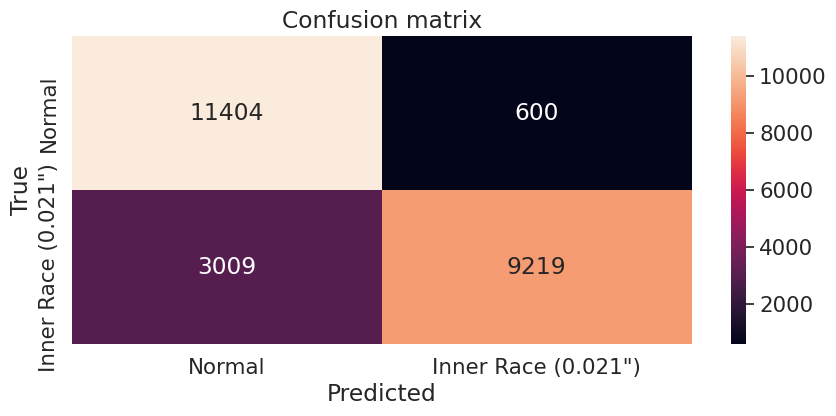

                     precision    recall  f1-score   support

             Normal       0.79      0.95      0.86     12004
Inner Race (0.021")       0.94      0.75      0.84     12228

           accuracy                           0.85     24232
          macro avg       0.87      0.85      0.85     24232
       weighted avg       0.87      0.85      0.85     24232



['/content/drive/MyDrive/project files/random_forest_model.joblib']

In [8]:
plt.figure(figsize=(10, 4))
sn.set(font_scale=1.4)  #for label size
sn.heatmap(cm_df, annot=True, fmt='g')  #fontsize
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.021")'])
print(cr)

# Save the decision tree model
path_to_save_model = '/content/drive/MyDrive/project files/random_forest_model.joblib'
from joblib import dump
dump(random_forest_classifier, path_to_save_model)
